<a href="https://colab.research.google.com/github/duridudu/dupository/blob/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_chapter03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**03-2 선형 회귀**

근처 이웃으로 판단하는 것보다 '선형 회귀'를 이용하면 예측하려는 값 근처에 샘플이 없어도 예측할 수 있다.

우리는 **길이로**(특성, input) 무게(타깃, 정답)를 **예측**한다.

==> train_input이랑 train_target이 짝꿍(훈련용 길이와 훈련용 정답인 무게), 

==>test_input이랑 test_target이 짝꿍(테스트용 길이와 테스트용 정답인 무게)


##**01. K-최근접 이웃 회귀의 한계**

* k-최근접 이웃 모델의 kneighbors() 메소드 쓰면 가장 가까운 이웃까지의 거리, 이웃 샘플의 인덱스 얻을 수 있다.

* 파이썬에서는 두 변수에 값 저장 한번에 되는 것 기억하기!!

==> 최근접 이웃 회귀는 갑자기 높은 값이 나오면 정확히 예측하지 못한다. 

In [9]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

#훈련셋과 테스트셋으로 나눔. 특성 데이터는 2차원 배열로!
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(perch_length, perch_weight, random_state=42)

train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

#최근접 이웃 개수를 3으로 하는 모델을 훈련
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

#길이가 50cm나 되는 농어의 무게 예측
print(knr.predict([[50]]))
#실제 농어의 무게는 훨씬 많이 나감!

[1033.33333333]


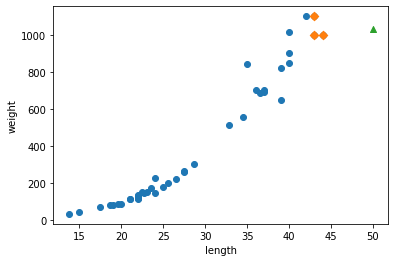

In [11]:
import matplotlib.pyplot as plt
distances, indexes=knr.kneighbors([[50]]) #최근접 이웃을 산점도에 표시하기.
plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker = 'D') #50cm농어의 이웃 샘플만

plt.scatter(50,1033,marker='^') #50cm 농어 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
print(np.mean(train_target[indexes])) #이웃 3개의 평균.

1033.3333333333333


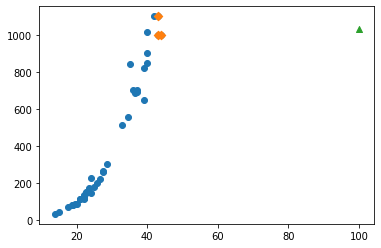

In [16]:
#그렇다면 k최근접 이웃 회귀는 100cm짜리 농어도 1033으로 예측할 것!
distances, indexes= knr.kneighbors([[100]])
plt.scatter(train_input, train_target) #기존 특성, 타깃 데이터
plt.scatter(train_input[indexes], train_target[indexes], marker='D') #이웃 3개

#길이 100cm짜리 농어 데이터
plt.scatter(100,1033,marker='^')
plt.xlabel=('length')
plt.ylabel=('weight')
plt.show() 

#이런 식이면 농어가 아무리 커져도 예측 무게가 더 늘어나지 않는다!

##**02. 선형 회귀**
데이터들의 특성을 잘 나타내는 직선 or 곡선으로 예측하기

* sklearn.linear_model 패키지의 LinearRegression 클래스

* 농어 무게 = (기울기 a) x (농어 길이) + 절편 b  (ax+b=y 식)

==> a, b 값은 coef_, intercept_에 저장되어 있음.


In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#선형회귀모델 훈련
lr.fit(train_input, train_target)

#50cm 농어 예측해보기
print(lr.predict([[50]]))

[1241.83860323]


In [18]:
#a와 b 값은
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


TypeError: ignored

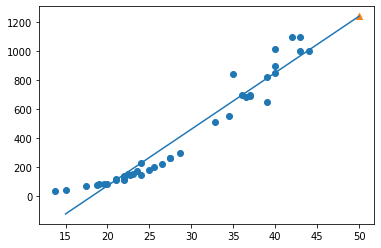

In [19]:
#농어의 길이 15에서 50까지를 직선으로 그려보자.
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50,1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
#결정계수를 확인해보자
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

#훈련세트 점수가 더 높다. 전체적으로 과소적합.
#그리고 위 그래프를 보면 농어 무게가 0까지 내려갈 예정==>2차방정식 필요!

0.9398463339976039
0.8247503123313558


##**03. 다항 회귀**
최적의 곡선을 찾아보자 by. 2차 방정식

==> 길이를 제곱한 항이 훈련 세트에 추가되어야 함. by. column_stack() 함수. 두 배열 붙임

==> **타깃값은 그대로 사용함!!** 답은 그대로 두고 훈련

In [22]:
train_poly=np.column_stack((train_input**2, train_input))
test_poly=np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)
#열이 2줄로 늘어남!

(42, 2) (14, 2)


In [24]:
lr= LinearRegression()
lr.fit(train_poly, train_target) #훈련 제곱셋과 안제곱 타깃
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [25]:
#a,b,c값 보기
print(lr.coef_, lr.intercept_)
#==> 무게=1.01길이^2 - 21.6길이 + 116.05

[  1.01433211 -21.55792498] 116.05021078278276


TypeError: ignored

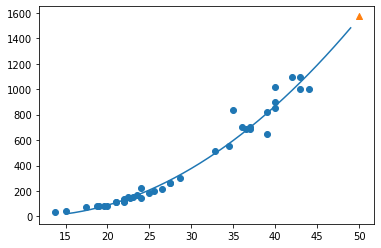

In [26]:
#구간별 직선을 그려보자
point=np.arange(15,50)
plt.scatter(train_input, train_target) #산포도
plt.plot(point, 1.01*point**2-21.6*point + 116.05) #곡선

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#더 적합, 음수 나오는 일도 없어짐

In [27]:
#결정계수 다시 측정-->훨씬 높아짐!
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
